LibreriasImports y entorno

In [1]:
import pandas as pd

#import seaborn y config
import seaborn as sns
sns.set_style('white')
sns.set(rc = {'figure.figsize':(15,8)})

# import plotly y config
import plotly.graph_objects as go
import plotly.io as pio  # me permite dibujar en un notebook
pio.renderers.default = "notebook"  # me permite dibujar en un notebook
import plotly.express as px 

import matplotlib.pyplot as plt

import numpy as np

#sklearn
from sklearn.model_selection import train_test_split  # separar en test y train
from sklearn.tree import DecisionTreeClassifier  # arboles
from sklearn.metrics import accuracy_score  # chequeo de resultados

Import datasets from github (public)

In [2]:
#cargo el dataframe desde el archivo subido al drive
#el dataset usado es de historico de temperaturas de la Ciudad de Buenos Aires
dft = pd.read_csv('https://raw.githubusercontent.com/gegrinberg/curso_data_BCGL/main/resources/historico_temperaturas.csv', sep = ',')
dft

,año,mes,máxima,mínima,media
0,1991,Enero,28.4,19.8,24.10
1,1991,Febrero,27.8,17.8,22.80
2,1991,Marzo,27.6,18.4,23.00
3,1991,Abril,22.4,13.6,18.00
4,1991,Mayo,20.7,12.2,16.45
...,...,...,...,...,...
349,2020,Febrero,29.6,19.3,24.45
350,2020,Marzo,28.6,20.1,24.35
351,2020,Abril,22.8,13.6,18.20
352,2020,Mayo,20.4,11.0,15.70


In [3]:
#cargo el dataframe desde el archivo subido al drive
#el dataset usado es de historico de precipitaciones de la Ciudad de Buenos Aires
dfp = pd.read_csv('https://raw.githubusercontent.com/gegrinberg/curso_data_BCGL/main/resources/historico_precipitaciones.csv', sep = ',')
dfp

,año,mes,mm,días
0,1991,Enero,190.0,7
1,1991,Febrero,30.5,6
2,1991,Marzo,55.0,8
3,1991,Abril,125.6,12
4,1991,Mayo,68.4,7
...,...,...,...,...
349,2020,Febrero,66.2,4
350,2020,Marzo,158.3,11
351,2020,Abril,87.2,7
352,2020,Mayo,22.6,4


In [4]:
#cargo el dataframe desde el archivo subido al drive
#el dataset usado es de historico de velocidad del viento de la Ciudad de Buenos Aires
dfv = pd.read_csv('https://raw.githubusercontent.com/gegrinberg/curso_data_BCGL/main/resources/velocidad-max-viento.csv', sep = ',')
dfv

,fecha,nudos,km/h
0,1991-01,38,70
1,1991-02,19,35
2,1991-03,32,59
3,1991-04,40,74
4,1991-05,26,48
...,...,...,...
359,2020-12,33,62
360,2021-01,36,67
361,2021-02,28,52
362,2021-03,32,59


Algo de data wrangling en dfv que trae un formato de fecha distinto

In [5]:
dfv[['año','mes']]=dfv.fecha.str.split('-', 1 , expand=True)
dfv['año']=pd.to_numeric(dfv['año'])
dfv['mes']=pd.to_numeric(dfv['mes'])

In [6]:
#Agrego columnas adicionales para representar el mes en numeros 1,2,3....12
#Adicionalmente agrego columna indicando la estacion del año para los meses que no son de solsticio
#creo funcion para limpiar los valores en cada columna
def num_mes(x):
  if x==1:
    return 'Enero'
  if x==2:
    return 'Febrero'
  if x==3:
    return 'Marzo'
  if x==4:
    return 'Abril'
  if x==5:
    return 'Mayo'
  if x==6:
    return 'Junio'
  if x==7:
    return 'Julio'
  if x==8:
    return 'Agosto'
  if x==9:
    return 'Septiembre'
  if x==10:
    return 'Octubre'
  if x==11:
    return 'Noviembre'
  if x==12:
    return 'Diciembre'            
  else:
    return 0

In [7]:
dfv['mes'] = dfv['mes'].apply(num_mes)

merge de los 3 datasets

In [8]:
dfg=pd.merge(dft,dfp, left_on=['año', 'mes'], right_on=['año', 'mes'])
dfg=pd.merge(dfg,dfv, left_on=['año', 'mes'], right_on=['año', 'mes'])

In [9]:
dfg

,año,mes,máxima,mínima,media,mm,días,fecha,nudos,km/h
0,1991,Enero,28.4,19.8,24.10,190.0,7,1991-01,38,70
1,1991,Febrero,27.8,17.8,22.80,30.5,6,1991-02,19,35
2,1991,Marzo,27.6,18.4,23.00,55.0,8,1991-03,32,59
3,1991,Abril,22.4,13.6,18.00,125.6,12,1991-04,40,74
4,1991,Mayo,20.7,12.2,16.45,68.4,7,1991-05,26,48
...,...,...,...,...,...,...,...,...,...,...
349,2020,Febrero,29.6,19.3,24.45,66.2,4,2020-02,27,50
350,2020,Marzo,28.6,20.1,24.35,158.3,11,2020-03,25,46
351,2020,Abril,22.8,13.6,18.20,87.2,7,2020-04,27,50
352,2020,Mayo,20.4,11.0,15.70,22.6,4,2020-05,32,59


Agrego columnas de características (número de més y estación según el año)

In [10]:
#Agrego columnas adicionales para representar el mes en numeros 1,2,3....12
#Adicionalmente agrego columna indicando la estacion del año para los meses que no son de solsticio
#creo funcion para limpiar los valores en cada columna
def mes_num(x):
  if'Enero' in str(x):
    return 1
  if'Febrero' in str(x):
    return 2
  if'Marzo' in str(x):
    return 3
  if'Abril' in str(x):
    return 4
  if'Mayo' in str(x):
    return 5
  if'Junio' in str(x):
    return 6
  if'Julio' in str(x):
    return 7
  if'Agosto' in str(x):
    return 8
  if'Septiembre' in str(x):
    return 9
  if'Octubre' in str(x):
    return 10
  if'Noviembre' in str(x):
    return 11
  if'Diciembre' in str(x):
    return 12            
  else:
    return 0

In [11]:
dfg['mes_num'] = dfg['mes'].apply(mes_num)

In [12]:
#creo funcion para asignar indicativo de estacion 
def estacion(x):
  if'Enero' in str(x):
    return 'Verano'
  if'Febrero' in str(x):
    return 'Verano'
  if'Marzo' in str(x):
    return 'Otono'
  if'Abril' in str(x):
    return 'Otono'
  if'Mayo' in str(x):
    return 'Otono'
  if'Junio' in str(x):
    return 'Invierno'
  if'Julio' in str(x):
    return 'Invierno'
  if'Agosto' in str(x):
    return 'Invierno'
  if'Septiembre' in str(x):
    return 'Primavera'
  if'Octubre' in str(x):
    return 'Primavera' 
  if'Noviembre' in str(x):
    return 'Primavera'
  if'Diciembre' in str(x):
    return 'Verano'          
  else:
    return 'error'

In [13]:
#agrego columna adicional indicando estaciones
dfg['estacion'] = dfg['mes'].apply(estacion)

gráficos exploratorios

<AxesSubplot:>

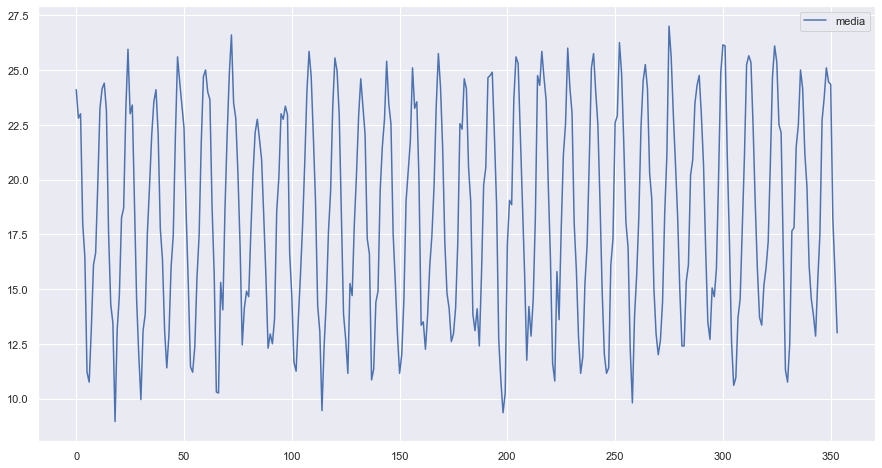

In [14]:
#graficos exploratorios Univariados - Temp media mensual por años
dfg.plot(y='media')

<AxesSubplot:>

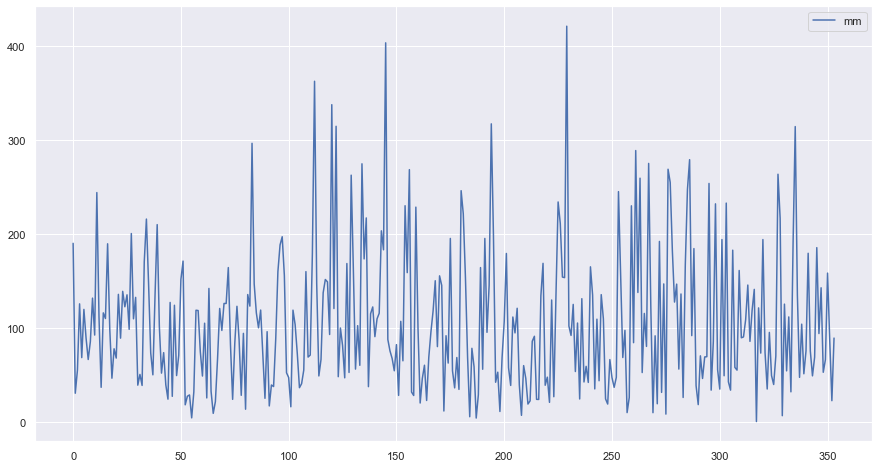

In [15]:
#graficos exploratorios Univariados - mm de lluvia mensual por años
dfg.plot(y='mm')

<AxesSubplot:>

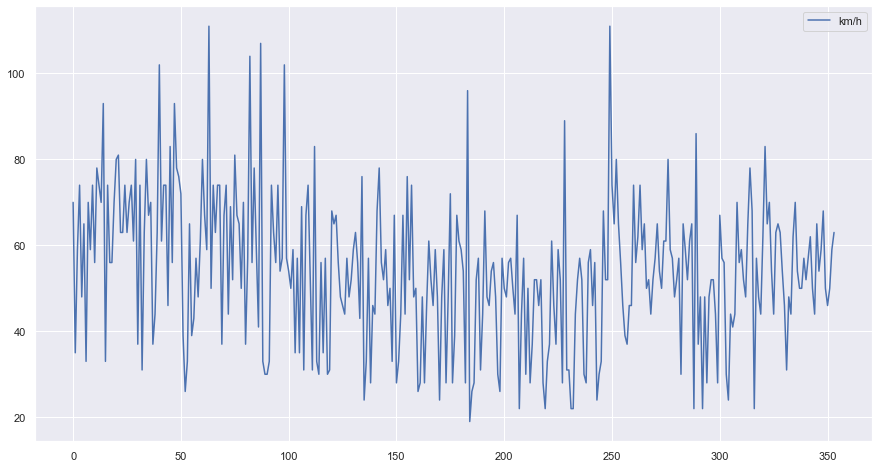

In [16]:
#graficos exploratorios Univariados - vel viento km/h
dfg.plot(y='km/h')

<AxesSubplot:>

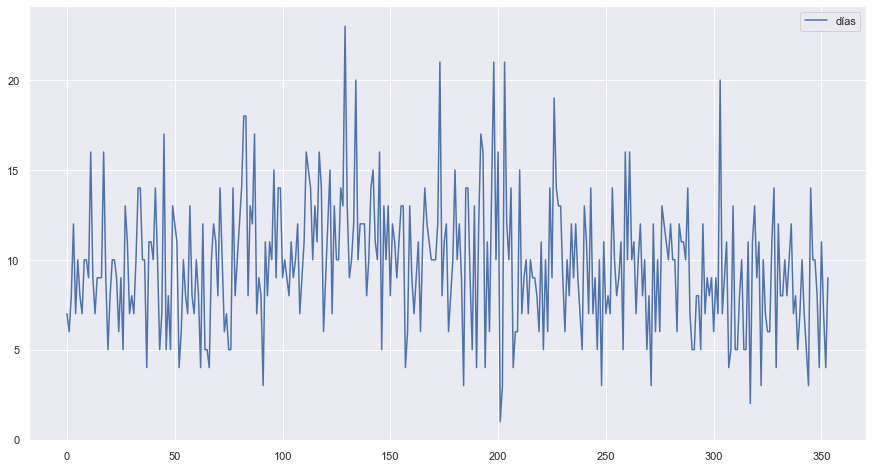

In [17]:
#graficos exploratorios Univariados - dias de lluvia por mes durante todos los años
dfg.plot(y='días')

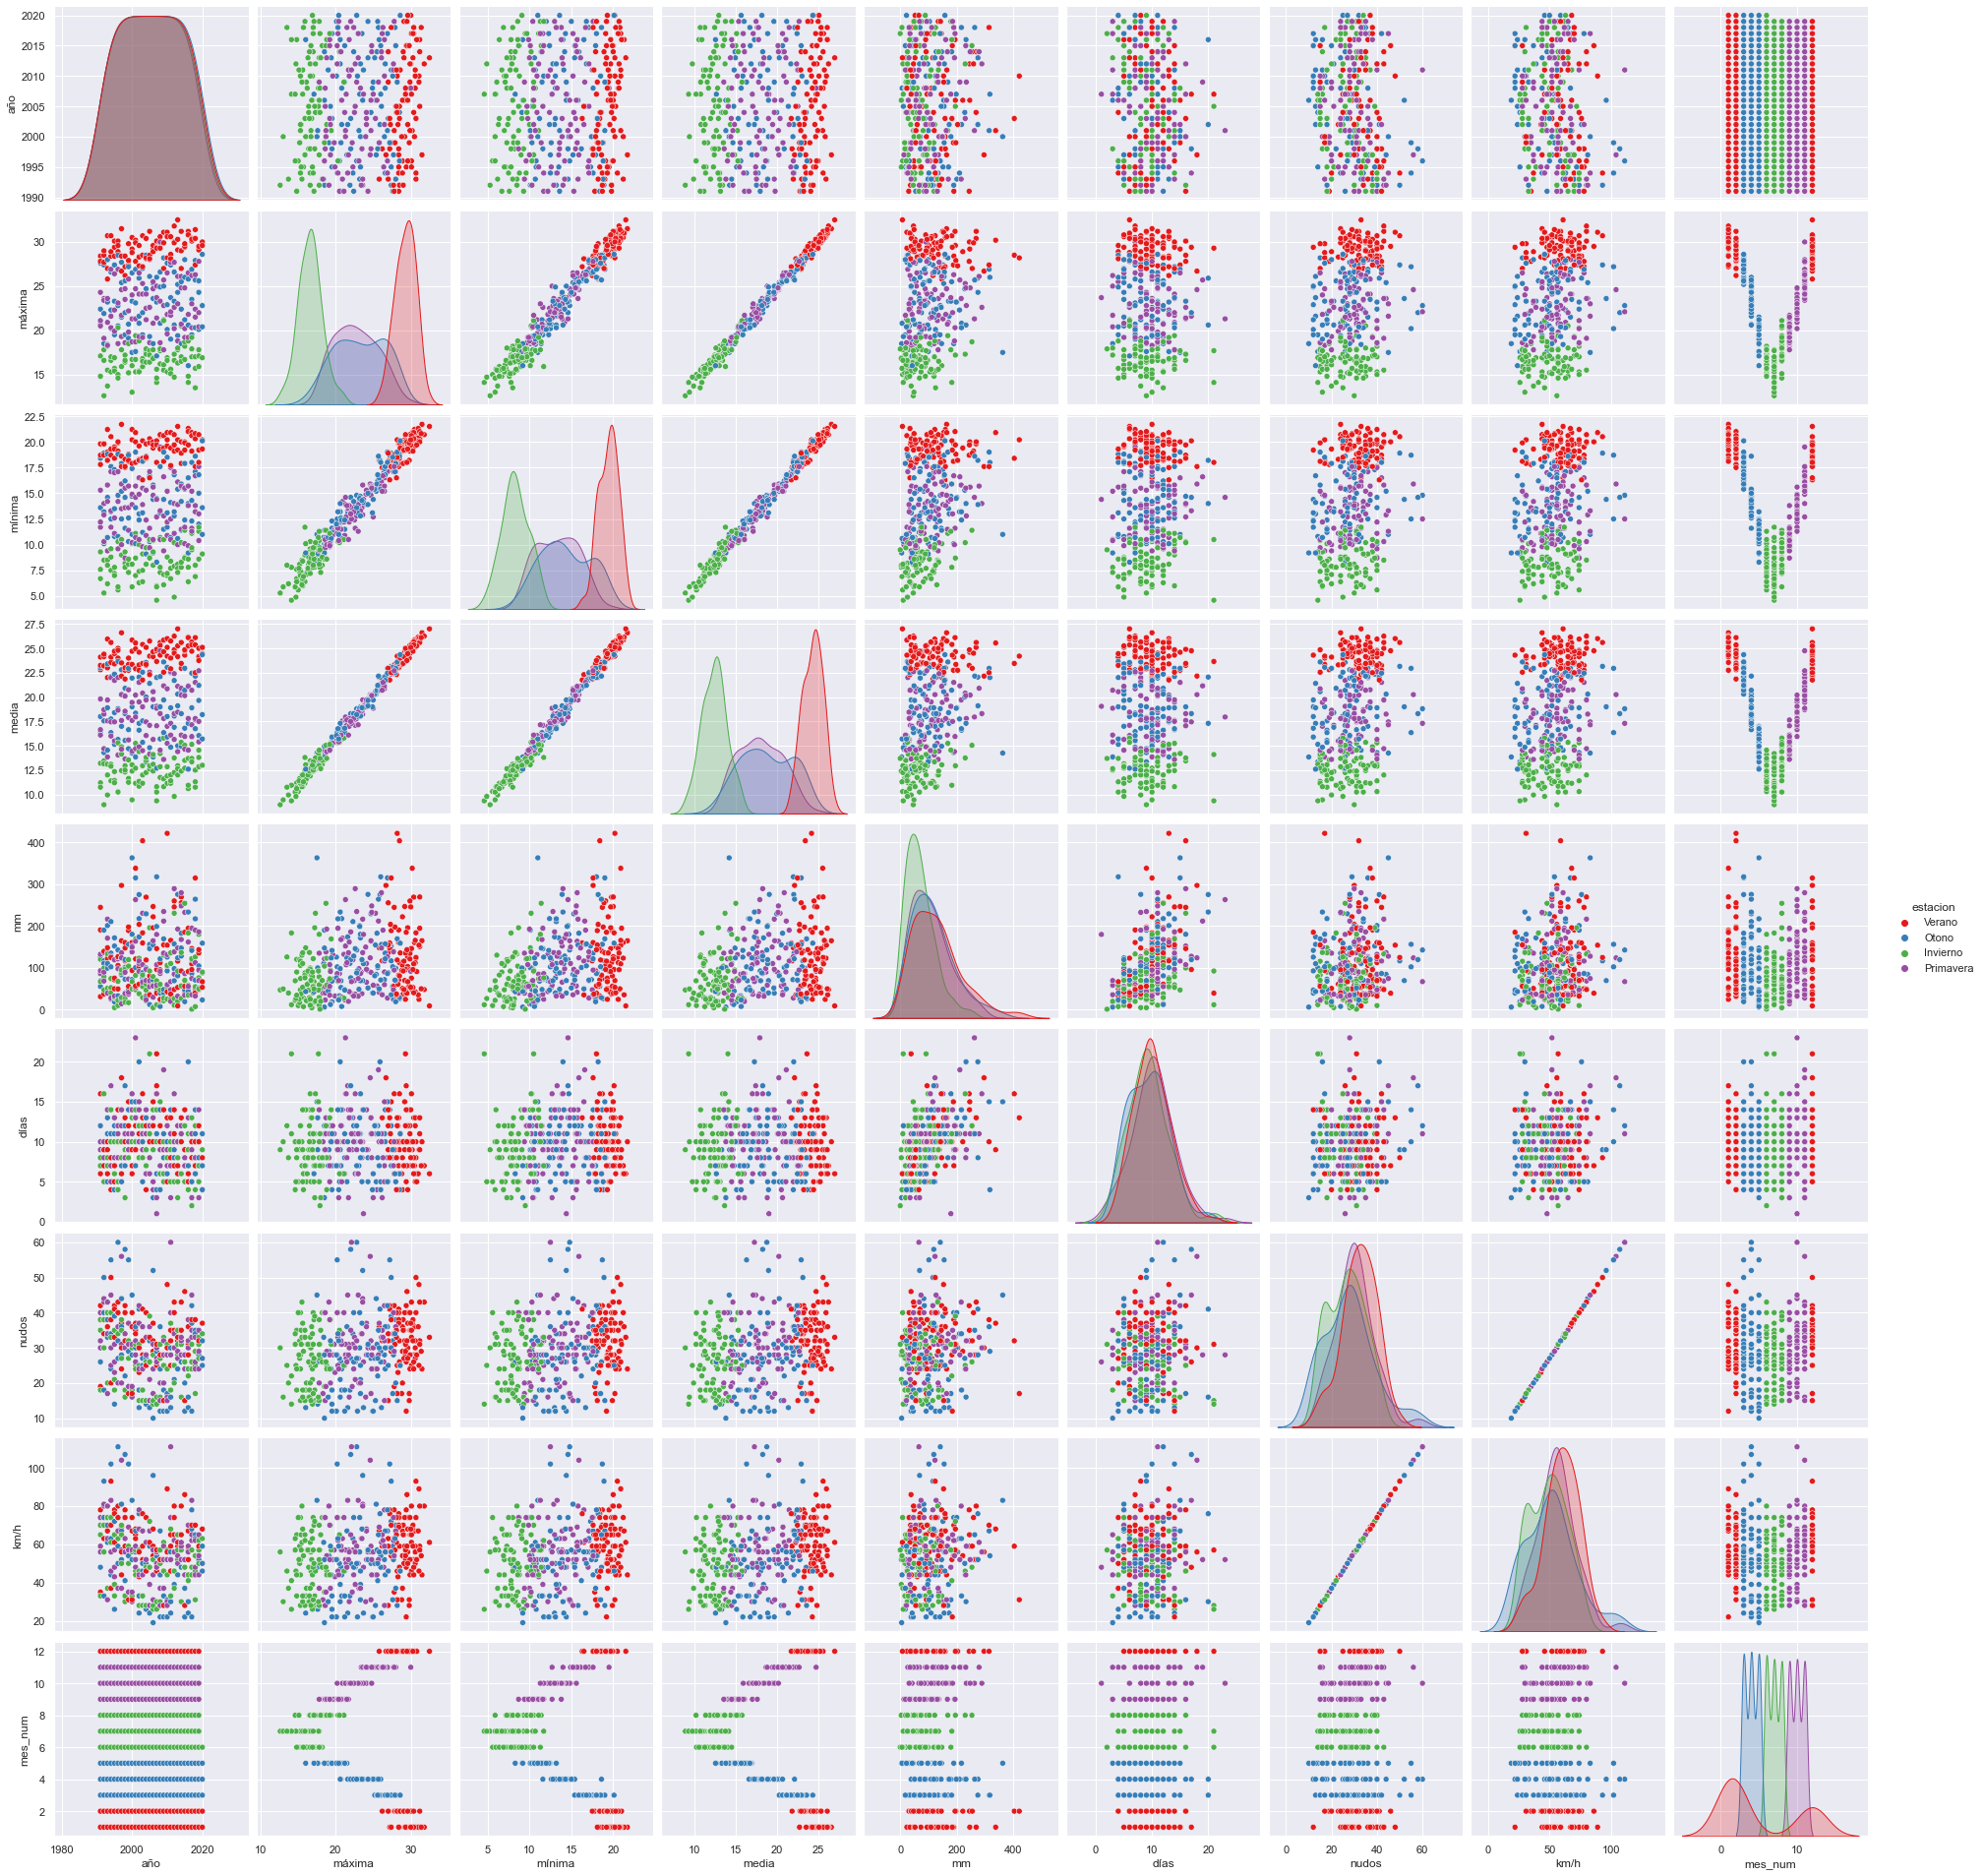

In [18]:
#Pairplot
sns.pairplot(dfg,hue = 'estacion' , height = 3 , palette = 'Set1')

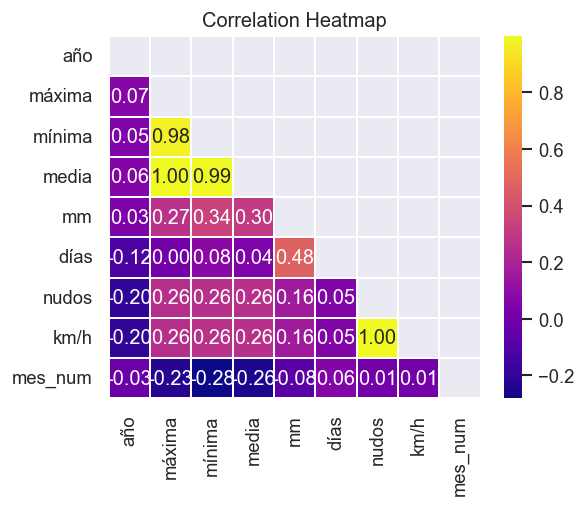

In [19]:
#Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(dfg.corr(),dtype = bool))
sns.heatmap(dfg.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

reducción de componentes principales

In [49]:
## Estandarizar variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['máxima',	'mínima',	'media',	'mm',	'días',	'km/h']  # retirado nudos por ser redundante con km/h
# Separating out the features
x = dfg.loc[:, features].values
# Separating out the target
y = dfg.loc[:,['estacion']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
#x=dfg.drop(['mes_x','estacion','año_x'], axis=1)
#datos.head()
x


array([[ 1.06721531,  1.32433338,  1.19410354,  1.14056744, -0.75454564,
         0.93635436],
       [ 0.94957738,  0.8789467 ,  0.92152841, -1.00987214, -1.03249481,
        -1.11300627],
       [ 0.91036473,  1.01256271,  0.96346305, -0.67955384, -0.47659646,
         0.29226959],
       ...,
       [-0.03073873, -0.05636532, -0.04296819, -0.24542121, -0.75454564,
        -0.23470886],
       [-0.50129045, -0.635368  , -0.56715113, -1.11638294, -1.58839316,
         0.29226959],
       [-1.18751173, -1.05848534, -1.13326871, -0.21845645, -0.19864729,
         0.52648224]])

In [50]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [51]:
comp=pca.fit_transform(x)

In [52]:
principalDF=pd.DataFrame(data = comp
             , columns = ['principal component 1', 'principal component 2'])

In [53]:
finalDF=pd.concat([principalDF, dfg[['estacion']]], axis = 1)

In [54]:
finalDF

,principal component 1,principal component 2,estacion
0,-2.367820,-0.315525,Verano
1,-0.904588,-1.860172,Verano
2,-1.409582,-1.171142,Otono
3,-0.237573,0.749721,Otono
4,0.930916,-0.707656,Otono
...,...,...,...
349,-1.723513,-2.074737,Verano
350,-2.147240,0.139055,Otono
351,0.250401,-0.707686,Otono
352,1.291177,-1.604258,Otono


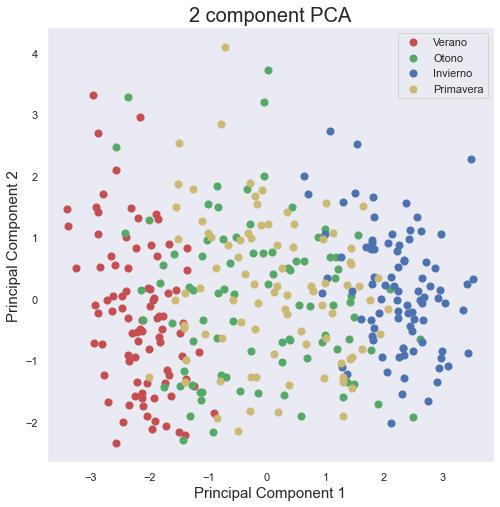

In [55]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Verano', 'Otono', 'Invierno', 'Primavera' ]
colors = ['r', 'g', 'b','y','cyan','black','darkorange','orange']
for estacion, color in zip(targets,colors):
    indicesToKeep = finalDF['estacion'] == estacion
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1']
               , finalDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [56]:
## Variabilidad explicada por cada componente
pca.explained_variance_ratio_

array([0.53845134, 0.22964861])

Los dos primeros componentes principales me ayudan a explicar el 66% de la informacion. Esto esta por ver si nos puede ser de utilidad.

In [57]:
## Variabilidad acumulada
pca.explained_variance_ratio_.cumsum()

array([0.53845134, 0.76809995])

separo en muestras de entrenamiento y testing

In [58]:
dfVerano=dfg['estacion']=='Verano'
dfVerano

0       True
1       True
2      False
3      False
4      False
       ...  
349     True
350    False
351    False
352    False
353    False
Name: estacion, Length: 354, dtype: bool

In [59]:
#Me quedo con 30% para test y 70% para train
dfVerano=dfg['estacion']=='Verano'
X_train, X_test, y_train, y_test = train_test_split(principalDF, dfVerano, test_size=0.30, random_state=42) 

In [60]:
tree = DecisionTreeClassifier(max_depth=2, random_state = 42, min_samples_split=10)  # Creamos el modelo, no me animo a cambiar el 42, la respuesta a todo
tree.fit(X_train,y_train)  # Entrenamos el modelo

DecisionTreeClassifier(max_depth=2, min_samples_split=10, random_state=42)

In [61]:
# calculo resultados del predictor
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [62]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9392712550607287
% de aciertos sobre el set de evaluación: 0.9345794392523364


conclusión: el verano y el invierno son fáciles de estimar